In [43]:
# Import Libraries 

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

In [44]:
# Tensor Flow Version

tf.__version__

'2.17.0'

In [45]:
'''Pre-processing training test,this is to avoid overfitting. Implement Geomatic tranformations like change size,rotate etc
   
   
   This called image augmentation
   
   Keras Image augmentation details - sroll down and select "Image Data Generator class " 
    '''

'Pre-processing training test,this is to avoid overfitting. Implement Geomatic tranformations like change size,rotate etc\n   \n   \n   This called image augmentation\n   \n   Keras Image augmentation details - sroll down and select "Image Data Generator class " \n    '

In [46]:
os.getcwd()

'C:\\Users\\HP\\Downloads\\Batch 93 Day42\\CNN dataset'

In [47]:
os.chdir('C:\\Users\\HP\\Downloads\\Batch 93 Day42\\CNN dataset\\')

In [48]:
# Pre-processing training set (Need to get Model)

train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [49]:
# Create model with traning data

# Class mode is either Binary or Categorical,since here we have two outputs Cat or Dog selected Binary other wisw Categirical

# target_size-Reduce the Target size to 64*64

# batch_size- Howmany images need to process in i=one Batch

training_set=train_datagen.flow_from_directory('training_set',target_size=(64,64),batch_size=32,class_mode='binary')
                                               

Found 8000 images belonging to 2 classes.


In [50]:
# Pre-processing Test Set

test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('test_set',target_size=(64,64),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [51]:
# Building CNN

# Create Sequence

cnn=tf.keras.models.Sequential()

In [52]:
# Convolution Layer

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
# Pooling

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [54]:
# Add secoond Convolution Layer

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
strides=cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [55]:
# Flattening (This should be the input to KNN)- 1D vector

cnn.add(tf.keras.layers.Flatten())

In [56]:
# Full Connection

# Add Layer - fully conected - Activation Functon Relu

# Unites: Number of hidden neurons

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [57]:
# Output Layer - Activation Function sigmoid

cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [58]:
# Training CNN

cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
# trainig the CNN onthe Training set and evaluating it on the Test set

cnn.fit(x=training_set,validation_data=test_set,epochs=3)

Epoch 1/3


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 188ms/step - accuracy: 0.5376 - loss: 0.6983 - val_accuracy: 0.6765 - val_loss: 0.6120
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 154ms/step - accuracy: 0.6736 - loss: 0.6056 - val_accuracy: 0.7145 - val_loss: 0.5642
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 153ms/step - accuracy: 0.6958 - loss: 0.5749 - val_accuracy: 0.7155 - val_loss: 0.5604


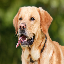

In [66]:
# Load the Data set

import numpy as np
import tensorflow.keras.utils as image
test_image=image.load_img('single_prediction/cat_or_dog_1.jpg',target_size=(64,64))
test_image

In [67]:
test_image=image.img_to_array((test_image))
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [68]:
print(prediction)


dog


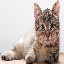

In [69]:
# Predict Future Data- 2 - Cat

import numpy as np
import tensorflow.keras.utils as image
test_image = image.load_img('single_prediction/cat_or_dog_2.jpg',target_size = (64,64))
test_image

In [70]:
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
training_set.class_indices
if result[0][0]==1:
    prediction='dog'
else:
    prediction='cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [71]:
print(prediction)

cat


In [73]:
'''Ok Prajwal'''

'Ok Prajwal'